<a href="https://colab.research.google.com/github/jhermosillo/DIPLOMADO_CDP/blob/main/Modulo%205%20-%20Deep%20Leaning/code/DL_05_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Part 1: Download data and set directories

In [ ]:
# Usaremos una base de datos de imágenes con dos clases: perros y gatos.

# El objetivo es diseñar redes neuronales de convolución para clasificar perros de gatos.
# Este problema es mucho más complejo que los anteriores, ya que: 1) las características
# visuales que comparten perros y gatos pueden ser altas; y 2) las imágenes pueden contener
# background común. Estas dos características hace difícil separa las imágenes.

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Dense, Flatten, UpSampling2D
from tensorflow.keras.layers import BatchNormalization, Dropout, LeakyReLU
from tensorflow.keras.regularizers import l1, l2
from tensorflow.keras.preprocessing.image import ImageDataGenerator

from skimage.io import imread

In [2]:
# Download data
_URL = 'https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip'
path_to_zip = tf.keras.utils.get_file('cats_and_dogs.zip', origin=_URL, extract=True)
PATH = os.path.join(os.path.dirname(path_to_zip), 'cats_and_dogs_filtered')

# List path contents
!ls $PATH

68608000/68606236 [==============================] - 2s 0us/step
train  validation  vectorize.py


In [3]:
# Define paths to training and validation images
train_dir = os.path.join(PATH, 'train')
val_dir = os.path.join(PATH, 'validation')

# Specify them by class
train_cats_dir = os.path.join(train_dir, 'cats')  # directory with training cat pictures
train_dogs_dir = os.path.join(train_dir, 'dogs')  # directory with training dog pictures
val_cats_dir = os.path.join(val_dir, 'cats')      # directory with validation cat pictures
val_dogs_dir = os.path.join(val_dir, 'dogs')      # directory with validation dog pictures

# Print example
print(train_cats_dir)

/root/.keras/datasets/cats_and_dogs_filtered/train/cats


In [4]:
# Count how many of them are there
n_cats_train = len(os.listdir(train_cats_dir))
n_dogs_train = len(os.listdir(train_dogs_dir))

n_cats_val = len(os.listdir(val_cats_dir))
n_dogs_val = len(os.listdir(val_dogs_dir))

n_total_train = n_cats_train + n_dogs_train
n_total_val = n_cats_val + n_dogs_val

# Print some info
print('total training cat images:', n_cats_train)
print('total training dog images:', n_dogs_train)

print('total validation cat images:', n_cats_val)
print('total validation dog images:', n_dogs_val)
print("--")
print("Total training images:", n_total_train)
print("Total validation images:", n_total_val)

total training cat images: 1000
total training dog images: 1000
total validation cat images: 500
total validation dog images: 500
--
Total training images: 2000
Total validation images: 1000


In [5]:
# No data has been loaded yet
%whos

Variable             Type        Data/Info
------------------------------------------
BatchNormalization   type        <class 'tensorflow.python<...>n_v2.BatchNormalization'>
Conv2D               type        <class 'tensorflow.python<...>rs.convolutional.Conv2D'>
Dense                type        <class 'tensorflow.python<...>keras.layers.core.Dense'>
Dropout              type        <class 'tensorflow.python<...>ras.layers.core.Dropout'>
Flatten              type        <class 'tensorflow.python<...>ras.layers.core.Flatten'>
ImageDataGenerator   type        <class 'tensorflow.python<...>mage.ImageDataGenerator'>
Input                function    <function Input at 0x7fbf9a394ef0>
LeakyReLU            type        <class 'tensorflow.python<...>d_activations.LeakyReLU'>
MaxPooling2D         type        <class 'tensorflow.python<...>rs.pooling.MaxPooling2D'>
PATH                 str         /root/.keras/datasets/cats_and_dogs_filtered
Sequential           type        <class 'tensorflow.pyth

# Part 2: Define batch-generator process

In [8]:
# Define some constants
batch_size = 64
IMG_H = 128
IMG_W = 128

In [10]:
# Define generator objects for training and validation data
train_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)

In [11]:
# Define method to load images from disk, apply rescaling, and resize them into specified size.
train_generator = train_datagen.flow_from_directory(batch_size=batch_size,
                                                directory=train_dir,
                                                shuffle=True,
                                                target_size=(IMG_H, IMG_W),
                                                class_mode='binary')
val_generator = val_datagen.flow_from_directory(batch_size=batch_size,
                                            directory=val_dir,
                                            target_size=(IMG_H, IMG_W),
                                            class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [12]:
# No data is been loaded yet
%whos

Variable             Type                  Data/Info
----------------------------------------------------
BatchNormalization   type                  <class 'tensorflow.python<...>n_v2.BatchNormalization'>
Conv2D               type                  <class 'tensorflow.python<...>rs.convolutional.Conv2D'>
Dense                type                  <class 'tensorflow.python<...>keras.layers.core.Dense'>
Dropout              type                  <class 'tensorflow.python<...>ras.layers.core.Dropout'>
Flatten              type                  <class 'tensorflow.python<...>ras.layers.core.Flatten'>
IMG_H                int                   128
IMG_W                int                   128
ImageDataGenerator   type                  <class 'tensorflow.python<...>mage.ImageDataGenerator'>
Input                function              <function Input at 0x7fbf9a394ef0>
LeakyReLU            type                  <class 'tensorflow.python<...>d_activations.LeakyReLU'>
MaxPooling2D         type    

(64, 128, 128, 3)
0.0
1.0
(64,)


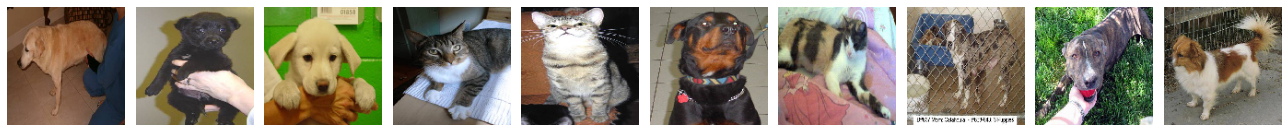

[1. 1. 1. 0. 0. 1. 0. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 0.]


In [13]:
# This 'next' function returns a batch (length=16 in this example) from the dataset
sample_x, sample_y = next(train_generator)
print(sample_x.shape)
print(sample_x.min())
print(sample_x.max())
print(sample_y.shape)

# Show a few of them
fig, axes = plt.subplots(1, 10, figsize=(18, 5))
axes = axes.flatten()
for img, ax in zip(sample_x[:10], axes):
  ax.imshow(img)
  ax.axis('off')
plt.tight_layout()
plt.show()

print(sample_y[:20])

# Part 3: Create CNN model and train it

In [ ]:
# == Q1 ==
# Usando la siguiente red, pude conseguir una pérdida = 0.22 y exactutid = 0.71
# en el set de validación.
# Diseña una red que te permita mejorar este desempeño.
# ¿Puedes lograr exactitud >= 0.8 en el set de validación?
# ¿Cuál es la pérdida asociada?
# ¿Cuántos parámetros tiene tu modelo?
# ¿Qué otros hiper-parámetros definiste?

In [ ]:
# Create a CNN
CNN = Sequential([
    BatchNormalization(input_shape=(IMG_H, IMG_W, 3)),
    
    Conv2D(32, 3, activation='relu'),
    MaxPooling2D(),
    Conv2D(64, 3, activation='relu'),
    MaxPooling2D(),
    Conv2D(128, 3, activation='relu'),
    MaxPooling2D(),
    Conv2D(256, 3, activation='relu'),
    MaxPooling2D(),
    Conv2D(512, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    
    Flatten(),
    BatchNormalization(),
    Dense(200, activation='relu'),
    Dense(100, activation='relu'),
    Dropout(0.3),
    Dense(100, activation='relu'),
    Dense(10, activation='relu'),
    Dense(1, activation='sigmoid')
])

CNN.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
batch_normalization_16 (Batc (None, 128, 128, 3)       12        
_________________________________________________________________
conv2d_72 (Conv2D)           (None, 128, 128, 32)      896       
_________________________________________________________________
conv2d_73 (Conv2D)           (None, 64, 64, 32)        9248      
_________________________________________________________________
dropout_28 (Dropout)         (None, 64, 64, 32)        0         
_________________________________________________________________
leaky_re_lu_54 (LeakyReLU)   (None, 64, 64, 32)        0         
_________________________________________________________________
conv2d_74 (Conv2D)           (None, 64, 64, 32)        9248      
_________________________________________________________________
conv2d_75 (Conv2D)           (None, 32, 32, 32)       

In [ ]:
# Compile: Define training parameters
CNN.compile(optimizer='sgd', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
# Train model
n_epochs = 50
history = CNN.fit(
    train_generator,
    steps_per_epoch=n_total_train//batch_size,
    epochs=n_epochs,
    validation_data=val_generator,
    validation_steps=n_total_val//batch_size
)

Epoch 1/50
31/31 [==============================] - 10s 296ms/step - loss: 0.6927 - accuracy: 0.5255 - val_loss: 0.6930 - val_accuracy: 0.5052
Epoch 2/50
31/31 [==============================] - 9s 286ms/step - loss: 0.6926 - accuracy: 0.5373 - val_loss: 0.6930 - val_accuracy: 0.5146
Epoch 3/50
31/31 [==============================] - 9s 280ms/step - loss: 0.6925 - accuracy: 0.5438 - val_loss: 0.6929 - val_accuracy: 0.5031
Epoch 4/50
31/31 [==============================] - 9s 281ms/step - loss: 0.6924 - accuracy: 0.5360 - val_loss: 0.6929 - val_accuracy: 0.5031
Epoch 5/50
31/31 [==============================] - 9s 280ms/step - loss: 0.6924 - accuracy: 0.5237 - val_loss: 0.6928 - val_accuracy: 0.5156
Epoch 6/50
31/31 [==============================] - 9s 281ms/step - loss: 0.6924 - accuracy: 0.5309 - val_loss: 0.6926 - val_accuracy: 0.5281
Epoch 7/50
31/31 [==============================] - 9s 280ms/step - loss: 0.6920 - accuracy: 0.5535 - val_loss: 0.6923 - val_accuracy: 0.5281
Epoch

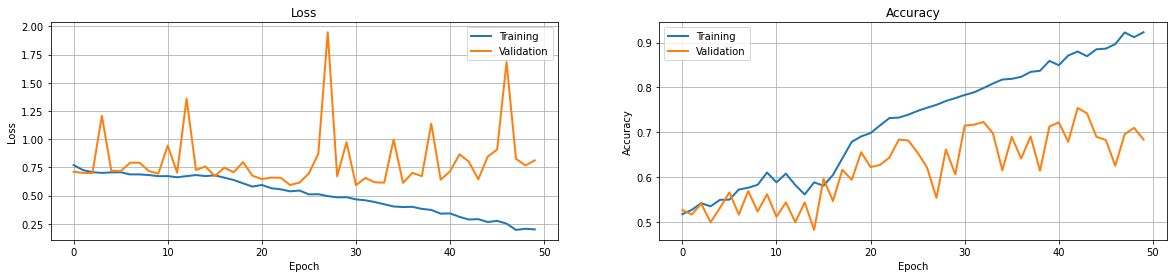

In [ ]:
# Plot loss
plt.figure(figsize=(20, 4))

plt.subplot(1, 2, 1)
plt.title('Loss')
plt.plot(history.history['loss'], label='Training', linewidth=2)
plt.plot(history.history['val_loss'], label='Validation', linewidth=2)
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)

plt.subplot(1, 2, 2)
plt.title('Accuracy')
plt.plot(history.history['accuracy'], label='Training', linewidth=2)
plt.plot(history.history['val_accuracy'], label='Validation', linewidth=2)
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.grid(True)

plt.show()

# Part 4: A new type of CNN

In [ ]:
# Importa los dígitos MNIST
# == Q2 ==
# Revisa esta y las tres celdas siguientes.
# Explica por qué crees que, al importar las imágenes, las asignamos a una
# variable llamada 'y' (en vez de 'x' como lo hicimos en la tarea anterior).
from tensorflow.keras.datasets import mnist
(y_train, _), (y_test, _) = mnist.load_data() # puedes revisar la documentación
y_train = y_train / 255.
y_test  = y_test  / 255.
y_train = np.reshape(y_train, (y_train.shape[0], y_train.shape[1], y_train.shape[2], 1))
y_test  = np.reshape(y_test, (y_test.shape[0], y_test.shape[1], y_test.shape[2], 1))

print("Shapes")
print("y_train:", y_train.shape)
print("y_test:", y_test.shape)

11493376/11490434 [==============================] - 0s 0us/step
Shapes
y_train: (60000, 28, 28, 1)
y_test: (10000, 28, 28, 1)


In [ ]:
# == Q3 ==
# Aquí defino una funión. ¿Puedes explica qué es lo que hace?
from skimage.transform import resize

def noisy_resize(IMG):
  img = resize(IMG.copy(), (7, 7))
  for row in range(7):
    for col in range(7):
      thresh = np.random.rand()
      if thresh > 0.9:
        img[row, col] = np.abs(img[row, col] - 1)
  return img

In [ ]:
# Ahora sí genero x (señales de entrada)
x_train = np.array([noisy_resize(IMG) for IMG in y_train])
x_test  = np.array([noisy_resize(IMG) for IMG in y_test ])

print("Shapes")
print("x_train:", x_train.shape)
print("x_test:", x_test.shape)

Shapes
x_train: (60000, 7, 7, 1)
x_test: (10000, 7, 7, 1)


In [ ]:
# Create a CNN
CNN = Sequential([
    Conv2D(32, 3, padding='same', activation='relu', input_shape=x_train.shape[1:]),
    Conv2D(32, 3, padding='same', activation='relu'),
    UpSampling2D(),

    Conv2D(32, 3, padding='same', activation='relu'),
    Conv2D(32, 3, padding='same', activation='relu'),
    UpSampling2D(),

    Conv2D(32, 3, padding='same', activation='relu'),
    Conv2D(1, 3, padding='same', activation='sigmoid'),
])

CNN.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 7, 7, 32)          320       
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 7, 7, 32)          9248      
_________________________________________________________________
up_sampling2d (UpSampling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 14, 14, 32)        9248      
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 14, 14, 32)        9248      
_________________________________________________________________
up_sampling2d_1 (UpSampling2 (None, 28, 28, 32)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 28, 28, 32)       

In [ ]:
# Compile: Define training parameters
CNN.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
history = CNN.fit(x=x_train, y=y_train, batch_size=64, epochs=50, verbose=1, validation_split=0.1, shuffle=True)

Epoch 1/50
844/844 [==============================] - 5s 5ms/step - loss: 0.2014 - accuracy: 0.8000 - val_loss: 0.1061 - val_accuracy: 0.8101
Epoch 2/50
844/844 [==============================] - 4s 5ms/step - loss: 0.1018 - accuracy: 0.8115 - val_loss: 0.0969 - val_accuracy: 0.8126
Epoch 3/50
844/844 [==============================] - 4s 5ms/step - loss: 0.0953 - accuracy: 0.8123 - val_loss: 0.0936 - val_accuracy: 0.8130
Epoch 4/50
844/844 [==============================] - 4s 5ms/step - loss: 0.0923 - accuracy: 0.8124 - val_loss: 0.0912 - val_accuracy: 0.8135
Epoch 5/50
844/844 [==============================] - 4s 5ms/step - loss: 0.0903 - accuracy: 0.8130 - val_loss: 0.0895 - val_accuracy: 0.8136
Epoch 6/50
844/844 [==============================] - 4s 5ms/step - loss: 0.0886 - accuracy: 0.8132 - val_loss: 0.0880 - val_accuracy: 0.8136
Epoch 7/50
844/844 [==============================] - 4s 5ms/step - loss: 0.0873 - accuracy: 0.8135 - val_loss: 0.0872 - val_accuracy: 0.8136
Epoch 

In [ ]:
# == Q4 ==
# ¿Qué problema está resolviendo esta red?

# == Q5 ==
# ¿Puedes mejorar el modelo para aumentar la exactitud a más de 0.95?
# Reporta el modelo resultante.

# Extra: Data augmentation

In [ ]:
# Definimos un nuevo tipo de generador, con parametros de aumentación
image_generator = ImageDataGenerator(rescale=1./255,
                                     rotation_range=45,
                                     width_shift_range=0.15,
                                     height_shift_range=.15,
                                     zoom_range=0.5,
                                     horizontal_flip=True,
                                     vertical_flip=True
                                    )

# Creamos un generador con parametros iguales a los definidos en el ejercicio anterior
img_gen = image_generator.flow_from_directory(batch_size=batch_size,
                                                directory=train_dir,
                                                shuffle=True,
                                                target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                class_mode='binary')

Found 2000 images belonging to 2 classes.


(16, 128, 128, 3)
0.0
1.0
(16,)
[1. 1. 0. 1. 0. 0. 0. 1. 0. 0. 1. 1. 1. 1. 0. 0.]


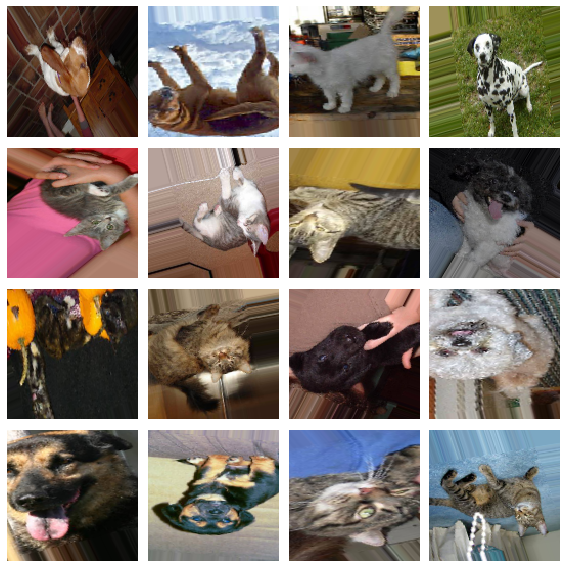

In [ ]:
# Muestra los ejemplos
sample_x, sample_y = next(img_gen)
print(sample_x.shape)
print(sample_x.min())
print(sample_x.max())
print(sample_y.shape)
print(sample_y[:20])

# Show a few of them
fig, axes = plt.subplots(4, 4, figsize=(8, 8))
axes = axes.flatten()
for img, ax in zip(sample_x, axes):
  ax.imshow(img)
  ax.axis('off')
plt.tight_layout()
plt.show()